# IMPORT LIBRARIES USED

In [217]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [218]:
tf.debugging.set_log_device_placement(False)

# SPECIFY THE PATH USED

## *Path to current directory*

In [219]:
full_path = os.path.abspath('')
full_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main'

## *Path to dataset*

In [220]:
dataset = os.path.join(full_path, 'model/hand_gesture_classifier/hand_gesture.csv')
dataset = os.path.normpath(dataset)
dataset

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\hand_gesture_classifier\\hand_gesture.csv'

## *Path to where the model is saved*

In [221]:
model_save_path = os.path.join(full_path, 'model/hand_gesture_classifier/hand_gesture_classifier.keras')
model_save_path = os.path.normpath(model_save_path)
model_save_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\hand_gesture_classifier\\hand_gesture_classifier.keras'

## *Path to the folder where the model is saved*

In [222]:
saved_model_path = os.path.join(full_path, 'model/hand_gesture_classifier')
saved_model_path = os.path.normpath(saved_model_path)
saved_model_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\hand_gesture_classifier'

## *Path to TfLite model*

In [223]:
tflite_save_path = os.path.join(full_path, 'model/hand_gesture_classifier/hand_gesture_classifier.tflite')
tflite_save_path = os.path.normpath(tflite_save_path)
tflite_save_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\hand_gesture_classifier\\hand_gesture_classifier.tflite'

# SET PARAMETERS

## *Classification number*

In [224]:
NUM_CLASSES = 9

## *Input length*

In [225]:
TIME_STEPS = 16
DIMENSION = 42

# LOAD DATA FOR LEARNING

## *Load data without dependency*

In [226]:
_dataset = pd.read_csv(dataset, header=None)
_dataset

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003906,0.004167,-0.000781,0.009722,0.000781,0.008333,0.001563,0.008333,0.003125,0.008333
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000781,-0.002778,-0.003125,0.000000,-0.002344,0.001389,-0.001563,0.001389,-0.002344,0.001389
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002344,-0.001389,-0.003906,0.002778,-0.003125,0.000000,-0.002344,0.000000,-0.002344,-0.001389
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002344,0.000000,-0.004687,0.004167,-0.003125,0.000000,-0.002344,0.000000,-0.002344,-0.001389
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.001563,-0.001389,-0.003125,0.002778,-0.002344,0.001389,-0.001563,0.000000,-0.001563,-0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.178906,0.197222,-0.067187,0.138889,-0.145313,0.191667,-0.172656,0.202778,-0.182812,0.188889
3596,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.174219,0.177778,-0.069531,0.120833,-0.142969,0.181944,-0.171094,0.195833,-0.182031,0.187500
3597,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.124219,0.216667,-0.042188,0.136111,-0.110937,0.201389,-0.135937,0.226389,-0.145313,0.227778
3598,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.164062,0.204167,-0.060156,0.125000,-0.133594,0.179167,-0.160156,0.191667,-0.168750,0.186111


In [227]:
# X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))
_dataset = _dataset.to_numpy()
X_dataset = _dataset[:, 1:]
X_dataset

array([[ 0.        ,  0.        ,  0.        , ...,  0.00833333,
         0.003125  ,  0.00833333],
       [ 0.        ,  0.        ,  0.        , ...,  0.00138889,
        -0.00234375,  0.00138889],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00234375, -0.00138889],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.22638889,
        -0.1453125 ,  0.22777778],
       [ 0.        ,  0.        ,  0.        , ...,  0.19166667,
        -0.16875   ,  0.18611111],
       [ 0.        ,  0.        ,  0.        , ...,  0.20138889,
        -0.15234375,  0.19444444]])

In [228]:
len(X_dataset[0,:])/16

42.0

## *Load dependent data (**Label**)*

In [229]:
y_dataset = _dataset[:, 0]
y_dataset

array([0., 0., 0., ..., 5., 5., 5.])

### *Value for random state*

In [230]:
RANDOM_SEED = 42

### *Splitting the dataset*

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# CONFIGURE THE LEARNING MODEL

## *Set up model structure*

### *Set parameters to configure the model*

#### *Parameter indicating whether LTSM (Long Short Term Memory) is used in the model*

In [232]:
use_lstm = True

#### *Parameter refer to the model*

In [233]:
model = None

### *Model configurating*

* Model structure using LSTM:
> 1. Input Layer
> 2. Reshape Layer ((32) -> (16, 2))
> 3. Dropout Layer (0.2)
> 4. LSTM Layer
> 5. Dropout Layer (0.5)
> 6. Fully-connected-10 with ReLU as activation
> 7. Fully-connected-5 with SoftMax as activation
* Model structure without using LSTM:
> 1. Input Layer
> 2. Dropout Layer (0.2)
> 3. Fully-connected-24 with ReLU as activation
> 4. Dropout Layer (0.5)
> 5. Fully-connected-10 with ReLU as activation
> 6. Fully-connected-5 with SoftMax as activation

In [234]:
if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        # tf.keras.layers.Reshape((16, 1), input_shape=(16, )), 
        # tf.keras.layers.LSTM(16, input_shape=(16, 1)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.name = "Hand_Gesture_Regconize_Using_LTSM_Model"
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.name = "Hand_Gesture_Regconize_Model"

c:\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## *Model summary*

### *Table*

In [235]:
model.summary()  

Model: "Hand_Gesture_Regconize_Using_LTSM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)             │ (None, 16, 42)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 42)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 16)             │         3,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,012 (15.67 KB)

 Trainable params: 4,012 (15.67 KB)

 Non-trainable params: 0 (0.00 B)

### *Graph*

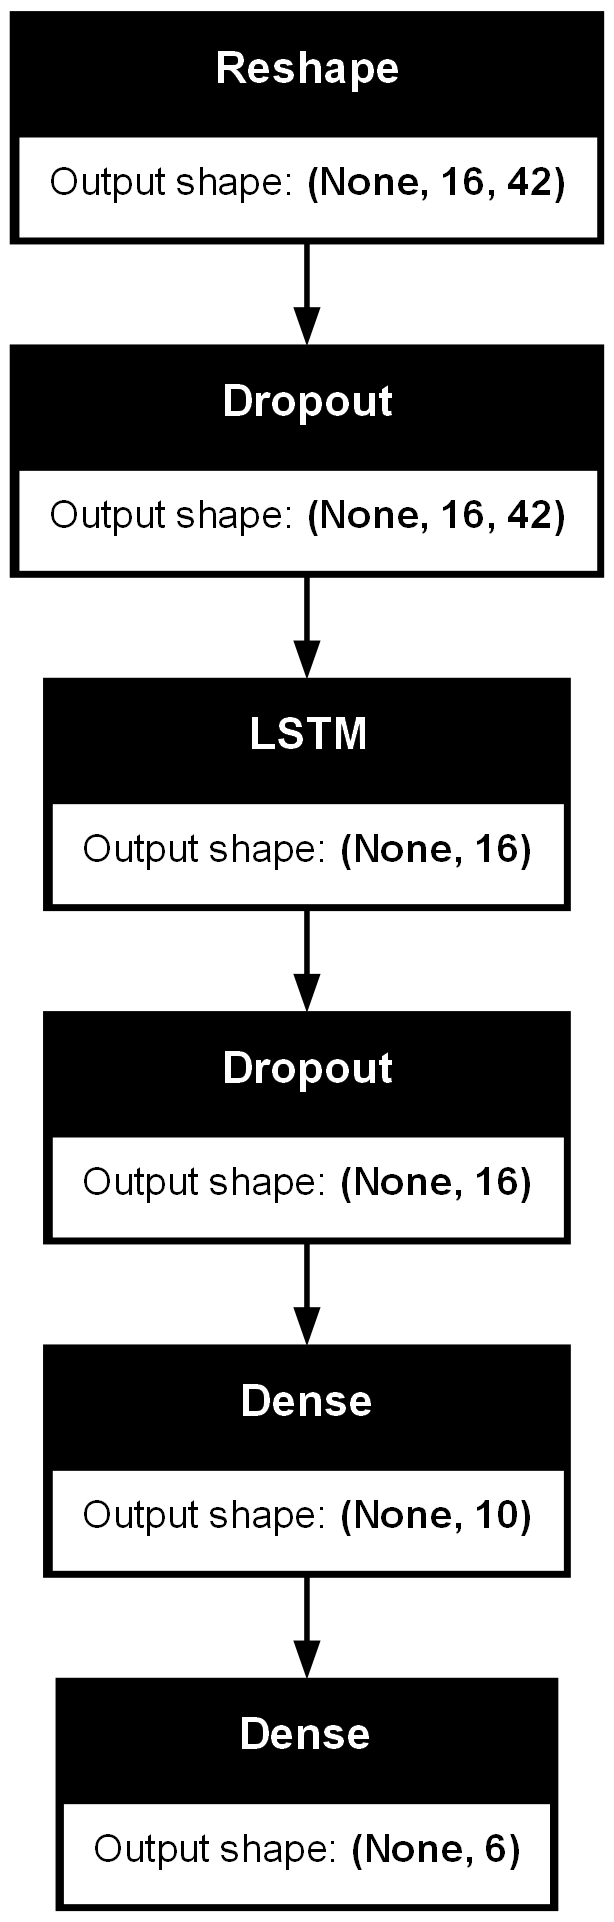

In [236]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file="graph/HandGestureModelStructure.png")

## *Set up callbacks for the model*

### *Model checkpoint callback*

In [237]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

### *Model early stopping callback*

In [238]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

## *Model compilation*

In [239]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# MODEL TRAINING

In [240]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1304 - loss: 1.7887
Epoch 1: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\hand_gesture_classifier\hand_gesture_classifier.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1490 - loss: 1.7823 - val_accuracy: 0.2511 - val_loss: 1.7345
Epoch 2/1000
13/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2416 - loss: 1.7200 
Epoch 2: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\hand_gesture_classifier\hand_gesture_classifier.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2493 - loss: 1.7122 - val_accuracy: 0.3467 - val_loss: 1.6346
Epoch 3/1000
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3736 - loss: 1.6159 
Epoch 3: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\hand_gesture_classifier\hand_gesture_classifier.keras
22/22 ━━━━━━━━━━━━━━━

# MODEL EVALUATION

## *Evaluate validation results*

In [241]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0108e-04 


## *Prediction test*

### *Loading a saved model*

In [242]:
model = tf.keras.models.load_model(model_save_path)

### *Prediction testing*

In [243]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
[3.79926446e-09 7.59433402e-12 9.99999881e-01 2.30668891e-12
 1.01783456e-07 7.56394890e-19]
2


# CONFUSION MATRIX

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


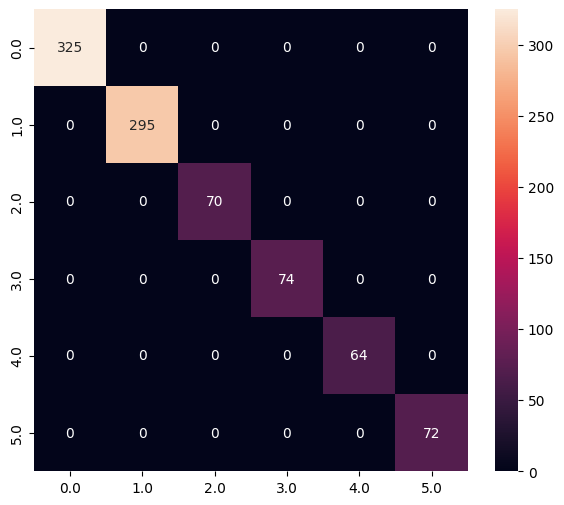

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       325
         1.0       1.00      1.00      1.00       295
         2.0       1.00      1.00      1.00        70
         3.0       1.00      1.00      1.00        74
         4.0       1.00      1.00      1.00        64
         5.0       1.00      1.00      1.00        72

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [244]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig("graph/HandGestureModelConfusionMatrix.png")
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# TRAINING HISTORY OF THE MODEL

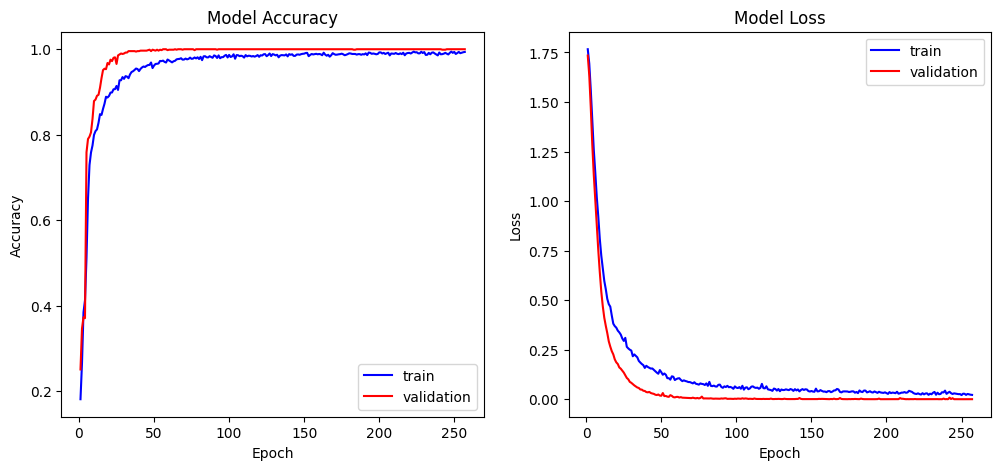

In [245]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    plt.savefig("graph/HandGestureModelTrainingHistory.png")
    
plot_history(history)

# MODEL CONVERTING FOR TensorFlow-Lite

## *Model export*

In [246]:
# model.save(model_save_path, include_optimizer=False)
model.export(filepath=saved_model_path, format="tf_saved_model")

INFO:tensorflow:Assets written to: e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\hand_gesture_classifier\assets


INFO:tensorflow:Assets written to: e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\hand_gesture_classifier\assets


Saved artifact at 'e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\hand_gesture_classifier'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 672), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1617936682496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1617936682320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1618055064640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1618055055840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1618055067984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1618055065520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1617940286624: TensorSpec(shape=(), dtype=tf.resource, name=None)


## *Load the exported model*

In [247]:
model = tf.keras.models.load_model(model_save_path)

## *Transform the model (**quantize**)*

In [248]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)  
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

19592

# REASONING TEST

## *Set up an interpreter*

In [249]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

## *Get input tensor*

In [250]:
input_details = interpreter.get_input_details()

## *Get output tensor*

In [251]:
output_details = interpreter.get_output_details()

## *Set the value for the input tensor*

In [252]:
interpreter.set_tensor(input_details[0]['index'], np.float32(np.array([X_test[0]])))

## *Inference implementation*

In [253]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1e+03 µs


## *Print the results*

In [254]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.7830237e-09 7.6754601e-12 9.9999988e-01 2.3241862e-12 1.0296066e-07
 7.7887378e-19]
2
